In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from math import sqrt
%matplotlib inline

# Задание

Выберите ваше любимое непрерывное распределение (чем меньше оно будет похоже на нормальное, тем интереснее; попробуйте выбрать какое-нибудь распределение из тех, что мы не обсуждали в курсе). Сгенерируйте из него выборку объёма 1000, постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины (чтобы величины были в одном масштабе, не забудьте выставить у гистограммы значение параметра normed=True).

Ваша задача — оценить распределение выборочного среднего вашей случайной величины при разных объёмах выборок. Для этого при трёх и более значениях n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних. Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. Обратите внимание: для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки. Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения (будьте внимательны с параметрами функции, она принимает на вход не дисперсию, а стандартное отклонение).

Опишите разницу между полученными распределениями при различных значениях n. Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n?

## Выбранное распределение

Возьмем экспоненциальное (показательное) распределение. Оно описывает интервалы времени между независимыми событиями, происходящими со средней интенсивностью λ. Количество наступлений такого события за некоторый отрезок времени описывается дискретным распределением Пуассона. Экспоненциальное распределение вместе с распределением Пуассона составляют математическую основу теории надёжности.

Кроме теории надёжности, экспоненциальное распределение применяется в описании социальных явлений, в экономике, в теории массового обслуживания, в транспортной логистике — везде, где необходимо моделировать поток событий.

Экспоненциально распределённая величина  может быть интерпретирована как сумма квадратов двух независимых нормально распределенных величин.

Плотность вероятности экспоненциально распределения:

$$E_\lambda(x)=\lambda e^{-\lambda x}$$

определена для неотрицательных действительных значений. Экспоненциальный закон является однопараметрическим, параетр λ являетсся строго положительной константой.

Функция экспоненциального распределения:

$$F(x)=\int_0^x λe^{-\lambda x}dx=1-e^{-\lambda x}$$


Матожидание и дисперсия экспоненциального распределения:

$$E\{E_\lambda\}={1 \over \lambda}$$

$$D\{E_\lambda\}={1 \over \lambda^2}$$



## Выполнение задания

Сгенерируем выборку объёма 1000 из экспоненциального распределения с параметром λ=2:

In [131]:
lambda_ = 2
expon_rv = sts.expon(scale=1/lambda_) #дисперсия = 1/𝜆^2, стандартное отклонение = 1/𝜆
sample = expon_rv.rvs(1000)
print('Первые 10 членов выборки:')
sample[:10]

Первые 10 членов выборки:


array([0.01681199, 0.49623426, 0.04806751, 0.06652072, 0.47280333,
       0.17745972, 0.5118672 , 0.46109684, 0.09452238, 0.43224023])

Построим гистограмму выборки и нарисуем поверх неё теоретическую плотность распределения экспоненциальной величины.

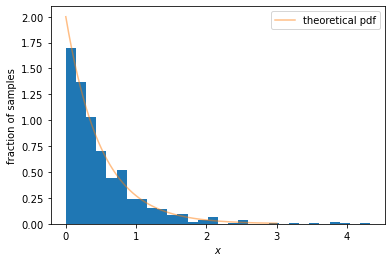

In [132]:
#гистограмма
plt.hist(sample, bins=30, density=True)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')

# на том же графике построим теоретическую плотность распределения:
x = np.linspace(0,3,1000)
pdf = expon_rv.pdf(x)
plt.plot(x, pdf, label='theoretical pdf', alpha=0.5)
plt.legend()

Text(0.5, 0, '$x$')

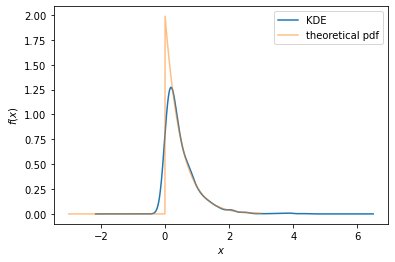

In [133]:
#Эмпирическая оценка плотности, построенная по выборке с помощью ядерного сглаживания:
df = pd.DataFrame(sample, columns=['KDE'])
ax = df.plot(kind='density')

# на том же графике построим теоретическую плотность распределения:
x = np.linspace(-3,3,1000)
pdf = expon_rv.pdf(x)
plt.plot(x, pdf, label='theoretical pdf', alpha=0.5)
plt.legend()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

Оценим распределение выборочного среднего экспоненциальной случайной величины при разных объёмах выборок. 

Для этого при значениях n 5, 10, 50, 100 сгенерируем 1000 выборок объёма n и построим гистограммы распределений их выборочных средних. 

Используя информацию о среднем и дисперсии экспоненциального распределения

$$E\{E_\lambda\}={1 \over \lambda}$$

$$D\{E_\lambda\}={1 \over \lambda^2}$$

посчитаем значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. 

Поверх каждой гистограммы нарисуем плотность соответствующего нормального распределения.

With n= 5


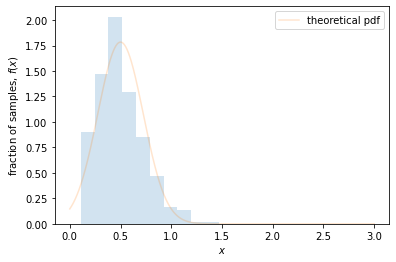

With n= 10


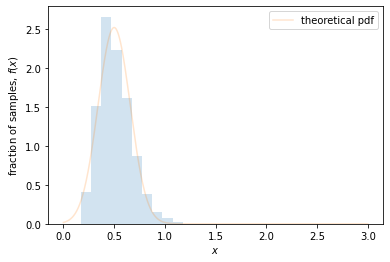

With n= 50


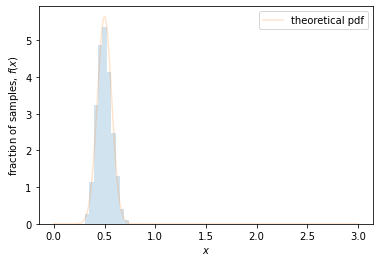

With n= 100


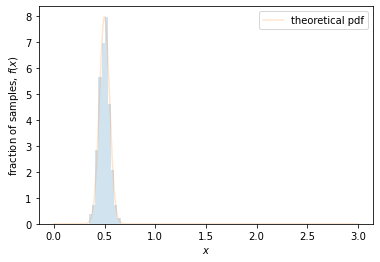

In [134]:
mu = 1 / lambda_
sigma = 1 / lambda_ #=sqrt(1 / lambda_**2)

for n in [5, 10, 50, 100]:
    chosen_mean = []
    for i in range(1000):
        sample = expon_rv.rvs(n)
        chosen_mean.append(np.mean(sample))
    # гистограмма
    print('With n=', n)
    plt.hist(chosen_mean, density=True, histtype='stepfilled', alpha=0.2)
    plt.ylabel('fraction of samples, $f(x)$')
    plt.xlabel('$x$') 
    
    # плотность соответствующего нормального распределения
    norm_rv = sts.norm(loc=mu, scale=sigma/sqrt(n))
    x = np.linspace(0,3,1000)
    pdf = norm_rv.pdf(x)
    plt.plot(x, pdf, label='theoretical pdf', alpha=0.2)
    plt.legend()
    plt.show()
    
        

Так как исходное распределение было сильно скошено, а также у него есть граница слева (0), то даже при значениях n=50, n = 100 разница между полученными распределениями сильно заметно. При этом с увеличением n аппроксиммация улучшается.

Вывод: центральная предельная теорема плохо работает, если исходное распределение слишком скошено. Чем сильнее оно скошено, тем больший объем выборки нужен для того, чтобы достичь хорошего качества нормальной аппроксимации.